# Графові ймовірнісні моделі

## ПОБУДОВА ФУНКЦІЇ РОЗПОДІЛУ ЙМОВІРНОСТЕЙ СТАНІВ ТА ЧАСОВИХ РЯДІВ ДЛЯ СОЦІАЛЬНОЇ МЕРЕЖІ

###  Лабораторна робота 5 (11-13)

**_Студентка Пороскун Олена. Група ПМ.м-21_**

*Література*

[1] Олемской А.И., Хоменко А.В. Синергетика конденсированной среды: Учебное пособие.   Сумы: Изд-во СумГУ, 2002. – С. 51-88. 
http://essuir.sumdu.edu.ua/handle/123456789/15973

[2] 4342 Methodological instructions for practical training on the discipline "Nonlinear processes and models" on the topic "Modelling of random process" [Текст] : for students of the speciality 113 "Applied mathematics" full-time training / O. V. Khomenko, A. M. Zaskoka. – Електронне вид. каф. ПМ та МСС. – Sumy : Sumy State University, 2018. – 35 p. http://lib.sumdu.edu.ua/library/docs/rio/2018/m4342.pdf

[3] О. В. Хоменко, О. А. Гончаров, Моделювання нелінійних процесів та систем: навч. посібник.   Суми: Вид-во СумДУ, 2023. – 197 с.

**Task 2**

Використовуючи алгоритм, викладений в [2, 3], побудувати часовий ряд стохастичної змінної для параметрів свого варіанту.

**Варіант 8**

* Параметри для часового ряду: рис. 3.10, С. 93 [3].

* *Алгоритм - [2], с. 21*

In [1]:
import math
import random
import csv
import numpy as np
from matplotlib import pyplot as plt

* Параметри системи:

In [2]:
pi = (4.0*math.atan(1.0))

t_ALL = 5000.0
coll_razb = 20000.0

delta_t = (t_ALL/coll_razb)

g = 0.2
I_eps = 0.0
D = 0.8

I_sigma = 10**(-20)
I_T = 100
Te = 33

tau_sigma = 1.0
sig_0 = 0.0

In [3]:
def BoxMuller():
    r = np.zeros(2)
    for j in range(2):
        max_num = 2147483647
        r[j] = random.randint(0, max_num) / (max_num+1)
        if(r[j] <= 1e-10):
            r[j] = 1e-10
    gg = math.sqrt(math.fabs(2.0*math.log(r[0])))*math.cos(2.0*pi*r[1])
    
    return gg

* Згідно алгоритму, розраховуємо значення sigma та відповідних проміжків часу. 

* Записуємо ці дані у файл з назвою *data.csv*.

In [4]:
with open('data.csv', 'w',  newline='') as data_csv:

    t=0.0
    sigma1 = sig_0
    # ff, I, sigma1, sigma2, percent, percent_new
    percent_new = 0 

    while True:
        if(t>=t_ALL): 
            break
        t += delta_t
        ff = -sigma1*(1.0-g) - (g*(1.0-Te/2.0)*2.0*sigma1)/(1.0+sigma1*sigma1)
        I = I_sigma + ((I_eps+I_T*sigma1*sigma1)*g*g)/((1.0+sigma1*sigma1)**2)
        sigma2 = sigma1 + ff*delta_t/tau_sigma + math.sqrt(2.0*D)*math.sqrt(I)*math.sqrt(delta_t)*BoxMuller()/tau_sigma

        '''
        if(sigma2<0): 
            sigma2=0

        # Potential same like in article
        sigma2 = sigma1 +  delta_t*(sigma1-sigma1*sigma1*sigma1 + BoxMuller()*sqrt(2.0*D))
        '''
        
        data = [t, sigma1]
        writer = csv.writer(data_csv)
        writer.writerow(data)

        ##
        percent = 100.0*t / t_ALL;
        if math.ceil(percent) != math.ceil(percent_new):
            #gotoxy(1,1)
            #print("{:.2f}".format(math.ceil(percent)))
            percent_new = percent
        ##
        sigma1 = sigma2
    

* Зчитуємо дані та передаємо їх у списки у вигляді не як рядковий тип string, а як числовий float.

In [5]:
time = []
sigmas1 = []

with open("data.csv") as data_file:
    csv_file = csv.reader(data_file)
    n = 0
    for row in csv_file:
        t, sigma1 = row
        t, sigma1 = float(t), float(sigma1)
        
        if n < 5:
            print("t: {}, \tsigma1: {}".format(t, sigma1))
            
        time.append(t)
        sigmas1.append(sigma1)
        
        n += 1
        

t: 0.25, 	sigma1: 0.0
t: 0.5, 	sigma1: -7.937959822265714e-12
t: 0.75, 	sigma1: -3.156586669888453e-11
t: 1.0, 	sigma1: -1.1087124984862536e-10
t: 1.25, 	sigma1: -4.4065672608313345e-11


* Будуємо графік часових рядів.

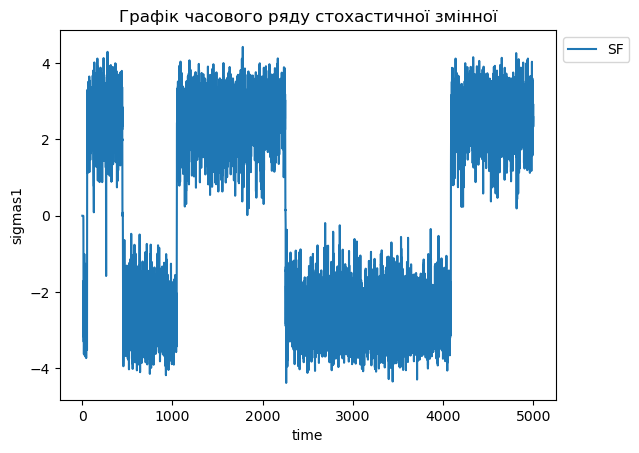

In [6]:
plt.plot(time, sigmas1, label = 'SF')
plt.xlabel("time")
plt.ylabel("sigmas1")
plt.title("Графік часового ряду стохастичної змінної")
plt.legend(bbox_to_anchor=(1,1), loc="upper left")